# 단순 선형 회귀(Simple Linear Regression Model)

* 회귀에서 널리 사용되는 성능평가지표는 MSE(평균 제곱 오차)이다.
* 통계적 방식의 회귀분석은 정규방정식을 사용해 문제를 해결하지만, 머신러닝 모델은 경사하강법을 사용해 문제를 해결한다.

### 정규방정식

* 정규방정식 $\hat{\beta} = (X^{T}X)^{-1}X^{T}y$을 사용하면 MSE 값을 최소로 하는 파라미터를 바로 얻을 수 있다.
* 최소자승법을 코드로 구현해도 되고, scikit-learn 패키지에서 선형 회귀 함수를 import 해도 된다.

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

=====

age와 charges 사이의 선형성 확인


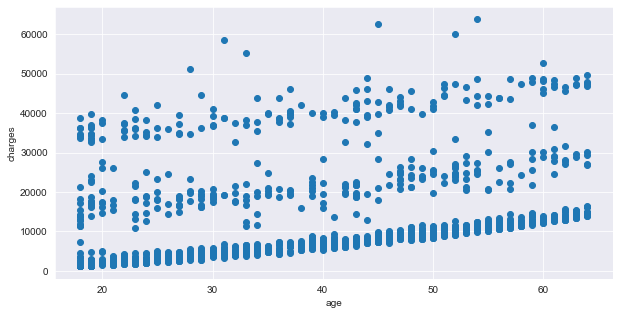


=====

선형 회귀 모델 결과
절편 [3165.88500606] 계수 [[257.72261867]]
결정계수 0.08940589967885804

=====

[[ 8062.61476073]
 [19660.13260074]]


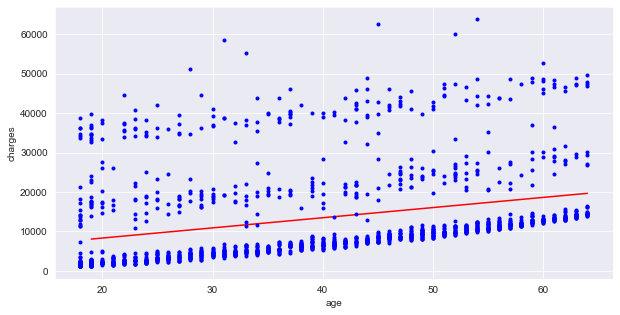

In [13]:
# scikit-learn의 LinearRegression
# sklean.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
    # fit_intercept : 절편을 계산할지에 대한 여부, False이면 절편없이 원점을 지나는 직선으로 만들어 준다.
    # normalize : True인 경우 X는 평균을 빼고 L2-norm으로 나누어 회귀 전 정규화한다. 만약 표준화를 하고 싶다면 nomalize=False로 설정한 뒤, fit()을 호출하기 전에 StandardScaler()를 사용하면 된다.
    # copy_X : True이면 X가 복사되고, False이면 덮어쓴다.
    # n_jobs : 계산 작업 횟수
    # positive : True로 하면 계수가 양수가 된다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('insurance.csv')
print(data.head())
print('\n=====\n')

# 나이(age)와 의료비용(charges) 사이의 선형 모델을 만들어보자.
# 우선, 두 데이터 사이의 선형성을 확인해보아야 한다.
print('age와 charges 사이의 선형성 확인')
x=data['age']
y=data['charges']

plt.figure(figsize = (10,5))
plt.scatter(x, y)
plt.xlabel('age')
plt.ylabel('charges')
plt.show()
print('\n=====\n')

# LinearRegression.fit()에 입력되는 데이터는 2차원이므로 array로 만들어주기
x=np.array(data['age'])
y=np.array(data['charges'])
x=x.reshape(1338, 1)
y=y.reshape(1338, 1)
lr = LinearRegression()
lr.fit(x, y)
print('선형 회귀 모델 결과')
print('절편', lr.intercept_, '계수', lr.coef_)

# 선형 회귀 모델의 결정계수(R^2) 확인해보기
print('결정계수', lr.score(x, y)) # 8%로 매우 낮다.
print('\n=====\n')

# 새로운 데이터 샘플(19살, 64살)을 선형 회귀 모델에 입력한 뒤, charges 예측해보기
x_new = [[19], [64]]
y_hat = lr.predict(x_new)
print(y_hat)

# 산점도에 회귀선을 그어 선형 모델이 얼마나 설명하는지 시각화
plt.figure(figsize = (10,5))
plt.plot(x_new, y_hat, '-r') # -(line), r(red)
plt.plot(x, y, 'b.') # b(blue), .(dot)
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

---

### 경사하강법
* 함수의 값이 낮아지는 방향으로 독립변수의 값을 바꿔가면서 최종적으로 최소 함숫값을 갖도록 하는 독립 변숫값을 찾는 방식

#### 머신러닝에서 경사하강법을 사용하는 이유
* 분석에서 마주하는 함수들은 형태가 복잡해 미분계수와 그 해를 찾기 어려울 수 있다.
* 데이터의 양이 큰 경우 경사하강법이 상대적으로 쉽게 컴퓨터로 구현될 수 있다.

#### 경사하강법의 종류
1. 배치 경사하강법
  * 반복 시 전체 훈련세트를 사용해 가중값을 갱신
2. 확률적 경사하강법
  * 한 개의 샘플데이터를 무작위로 선택하고, 그 샘플에 대한 경사를 계산한다.
3. 미니 배치 경사하강법
  * 각 스텝을 반복할 때 임의의 30~50개 관측값으로 경사를 계산하고 모델의 가중값을 갱신한다.

SGD 회귀 모델 결과
절편 [9141.2455153] 계수 [482.40826847]
[18307.00261619 40015.37469723]


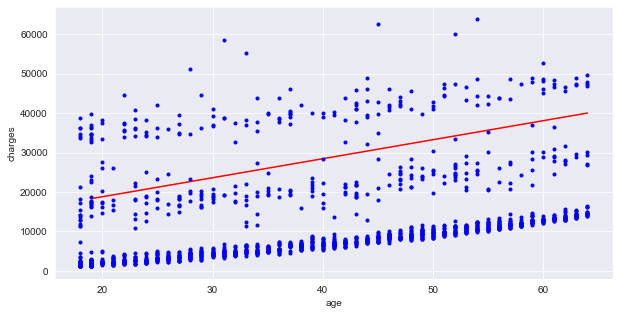

In [23]:
# scikit-learn의 SGDRegressor
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor

data = pd.read_csv('insurance.csv')
x=np.array(data['age'])
y=np.array(data['charges'])
x=x.reshape(1338, 1)
y=y.reshape(1338, 1)

sgd_reg = SGDRegressor(max_iter=1000, random_state=34)
sgd_reg.fit(x, y.ravel())

print('SGD 회귀 모델 결과')
print('절편', sgd_reg.intercept_, '계수', sgd_reg.coef_)

# 새로운 데이터 샘플(19살, 64살)을 SGD 회귀 모델에 입력한 뒤, charges 예측해보기
x_new = [[19], [64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

# 산점도에 회귀선을 그어 선형 모델이 얼마나 설명하는지 시각화
plt.figure(figsize = (10,5))
plt.plot(x_new, y_hat, '-r') # -(line), r(red)
plt.plot(x, y, 'b.') # b(blue), .(dot)
plt.xlabel('age')
plt.ylabel('charges')
plt.show()